# Isolation Forest Anomaly Detection.

In [4]:
import pandas as pd
df = pd.read_csv('outlier_dataset.csv')
df.head()

,Feature1,Feature2
0,52.483571,51.788937
1,49.308678,52.803923
2,53.238443,55.415256
3,57.615149,55.269010
4,48.829233,43.111653


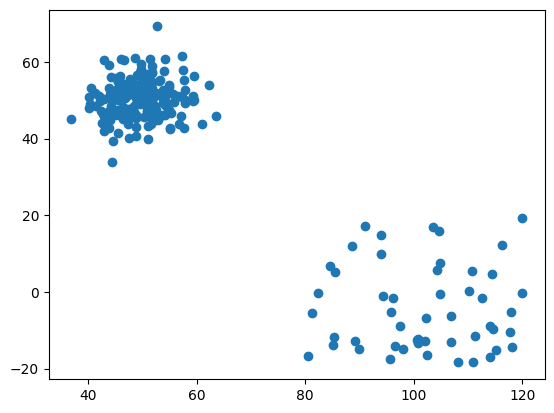

In [5]:
import matplotlib.pyplot as plt 
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [10]:
from sklearn.ensemble import IsolationForest

In [24]:
clf = IsolationForest(contamination='auto')
clf.fit(df)
prediction = clf.predict(df)

In [25]:
prediction

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [26]:
import numpy as np 
index = np.where(prediction<0)
index

(array([  9,  13,  20,  34,  37,  52,  62,  74,  79,  82,  84, 106, 113,
        123, 125, 178, 179, 182, 193, 200, 201, 202, 203, 204, 205, 206,
        207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
        220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
        233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245,
        246, 247, 248, 249]),)

In [27]:
x = df.values

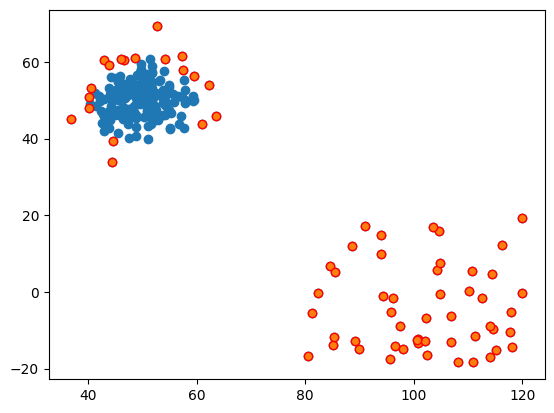

In [28]:
index = np.where(prediction < 0)
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0], x[index,1],edgecolors='r')


## DBSCAN Clustring for local outliers

In [1]:
from sklearn.cluster import DBSCAN
# from sklearn.datasets import make_moons 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.datasets import make_circles

In [2]:
X,y = make_circles(n_samples=750,factor=0.3, noise=0.1)

In [3]:
X

array([[-0.57296612, -1.01308358],
       [-0.11893859,  0.87919004],
       [-0.33098098,  0.15829209],
       ...,
       [ 0.13359598, -0.22370673],
       [-0.21412341,  0.27589969],
       [ 0.69165088, -0.64223151]], shape=(750, 2))

In [28]:
import pandas as pd 
df = pd.DataFrame(X,y,columns=['0','1'])

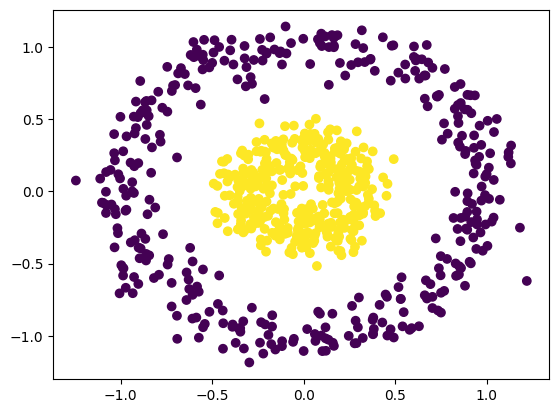

In [29]:
plt.scatter(X[:,0],X[:,1],c=y)

In [30]:
from sklearn.neighbors import LocalOutlierFactor

In [31]:
clf = LocalOutlierFactor(n_neighbors=5,algorithm='auto')

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [32]:
prediction = clf.fit_predict(X,y)

In [33]:
import numpy as np 
index = np.where(prediction < 0)
index

(array([ 47, 178, 200, 202, 256, 334, 350, 360, 421, 422, 434, 435, 481,
        497, 506, 511, 519, 602, 646, 658, 683, 698, 724]),)

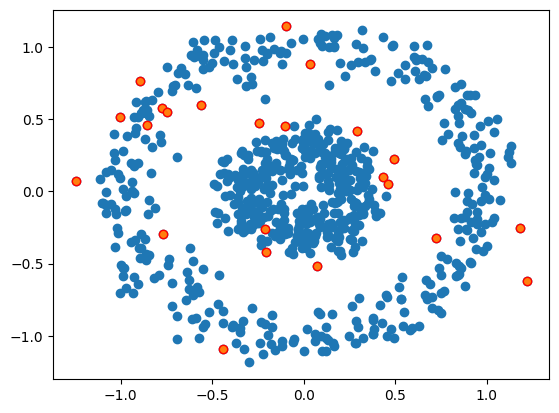

In [37]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(X[index,0],X[index,1],edgecolors='r')

In [38]:
# Conclusion-- The above red points are the local outlier in the provided data